In [1]:
import os
import yaml
import pickle
import matplotlib
import gc

import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.ticker as ticker
import torchvision
from scipy import stats
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer
import scipy

import bilby
import pandas as pd
from pprint import pprint

matplotlib.use('pdf')

os.environ['MPLCONFIGDIR'] = '/home/local/nihargupte'
import dingo.gw.dataset.generate_dataset 
from dingo.gw.dataset import WaveformDataset
import dingo.gw.training.train_builders
from dingo.gw.ASD_dataset.noise_dataset import ASDDataset
import dingo.gw.waveform_generator
from dingo.gw.domains import build_domain, build_domain_from_model_metadata
import dingo.gw.inference
from dingo.gw.gwutils import get_window_factor
from dingo.gw.transforms import *
from dingo.core.models import PosteriorModel
from dingo.gw.inference import injection
from dingo.gw.inference.gw_samplers import GWSamplerGNPE, GWSampler

from utils import get_snr

%matplotlib inline
%load_ext autoreload
%autoreload 2

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-fco05w_h because the default path (/home/nihargupte/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
bilby_result = bilby.result.read_in_result(filename="/home/local/nihargupte/dingo-devel/tutorials/05_data_vis/SEOBNRv4HM_ROM_O1_2048_comparison/GW150914/GW150914_result.json")
h1_strain = np.genfromtxt('/home/local/nihargupte/dingo-devel/tutorials/05_data_vis/SEOBNRv4HM_ROM_O1_2048_comparison/GW150914/H1_GW150914_frequency_domain_data.dat')
l1_strain = np.genfromtxt('/home/local/nihargupte/dingo-devel/tutorials/05_data_vis/SEOBNRv4HM_ROM_O1_2048_comparison/GW150914/L1_GW150914_frequency_domain_data.dat')

In [3]:
import h5py
from dingo.core.dataset import recursive_hdf5_load
filename = "/home/local/nihargupte/dingo-devel/tutorials/05_data_vis/SEOBNRv4HM_ROM_O1_2048_comparison/GW150914/dingo/dingo_samples_gps-1126259462.391.hdf5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[1]

    # Get the data
    dingo_samples = np.array(f[a_group_key])

labels = [
    "chirp_mass",
    "mass_ratio",
    "phase",
    "chi_1",
    "chi_2",
    "theta_jn",
    "dec",
    "ra",
    "geocent_time",
    "luminosity_distance",
    "psi",
]
dingo_samples = {k:np.array([d[i] for d in dingo_samples]) for i, k in enumerate(labels)}
print(dingo_samples["mass_ratio"].shape)

Keys: <KeysViewHDF5 ['context', 'samples']>
(50000,)


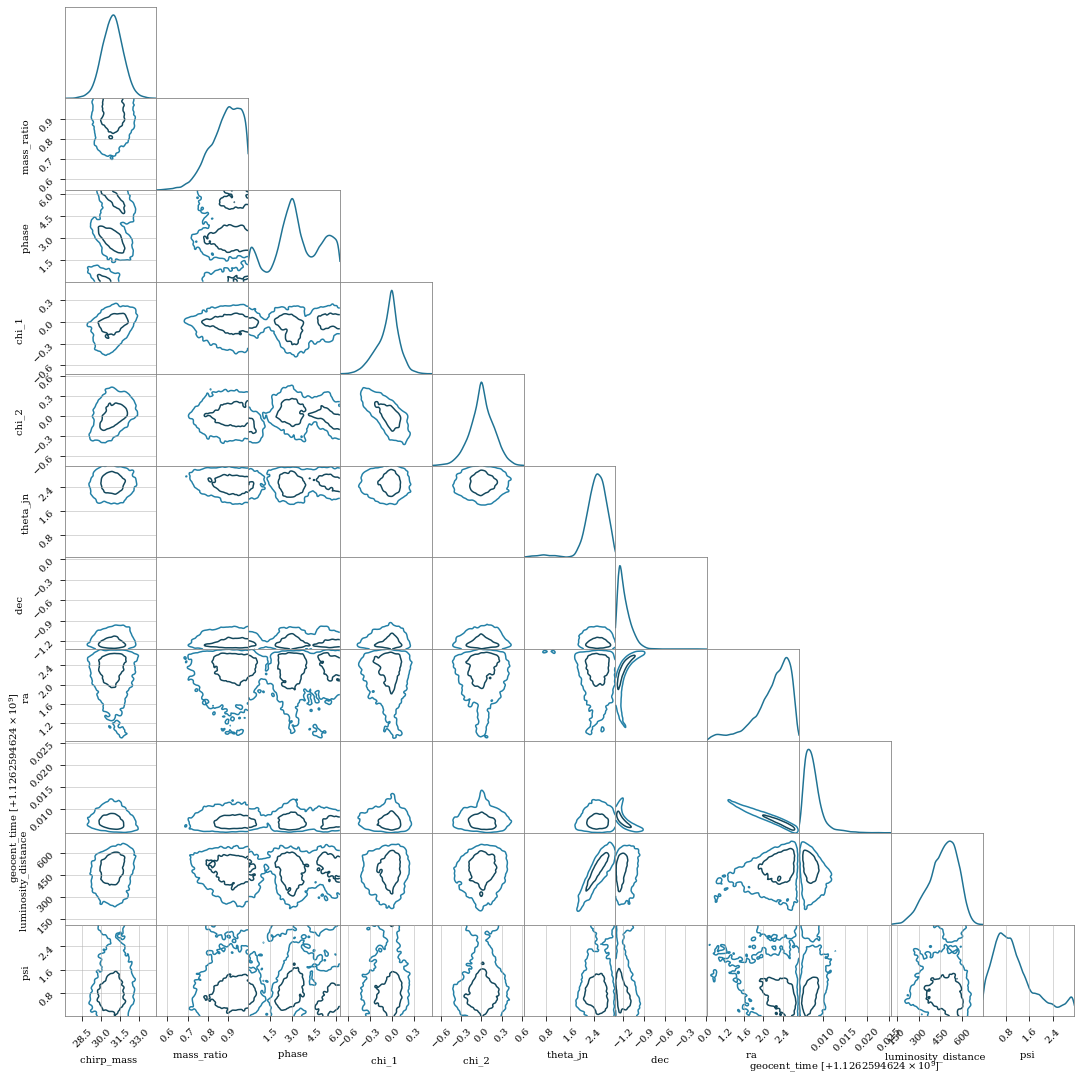

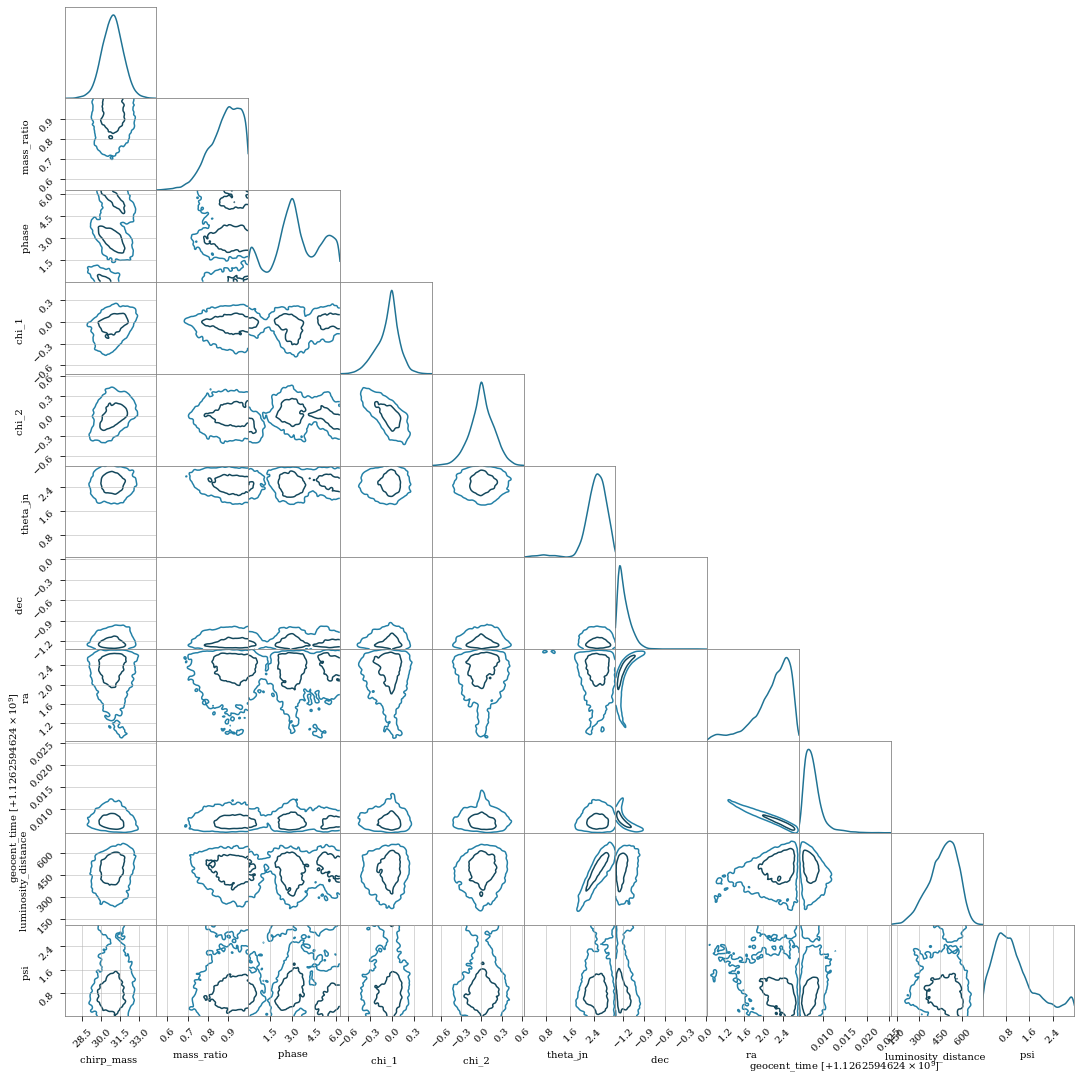

In [4]:
charizard_hex = ('#cd5241', '#084152', '#eede7b', '#207394', '#eeb45a', '#e64110', '#ff524a', '#f6a410', '#08398b', '#626262', '#833118')
plt.rcParams['text.usetex'] = False
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=charizard_hex)


N = 2
c = ChainConsumer()
bilby_posterier = bilby_result.posterior[labels].to_dict('list')
c.add_chain(bilby_posterier, color=charizard_hex[3], name='bilby')
# c.add_chain(dingo_samples, color=charizard_hex[0], name='dingo')
c.configure(
    linestyles=["-"] * N,
    linewidths=[1.5] * N,
    sigmas=[np.sqrt(2) * scipy.special.erfinv(x) for x in [0.5, 0.9]],
    shade=[False] + [True] * (N - 1),
    shade_alpha=0.3,
    bar_shade=False,
    label_font_size=10,
    tick_font_size=10,
    usetex=False,
    legend_kwargs={"fontsize": 30},
    # kde=0.7
)

c.plotter.plot()